# Data Science Project


**College/University Name**: _CICCC - Cornerstone International Community College of Canada_  
**Course**: _Machine Learning_  
**Instructor**: _Austin Egbal_  
**Student Names**: _Amir Lima Oliveira_, _Otávio Londero_, _Yuan Chan_

---

### Project Title
    _Housing Proces Competition for Kaggle Learn Users_
---

#### Objective
* Build an end-to-end pipeline with:
    - Load & Import
    - Inspect
    - Modeling with __Random Forest__ by default
    - Evaluation
    - Conclusion
---

#### Dataset Overview
- **Source:** [[Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/competitions/home-data-for-ml-course/data)]
- **Description:** Dataset of Ames housing with 80 features including property size, quality, location, and amenities to predict final sale price in dollars (target variable).
- **Credits:** DanB. Housing Prices Competition for Kaggle Learn Users. https://kaggle.com/competitions/home-data-for-ml-course, 2018. Kaggle.

---

## Table of Contents
### 1. [Import Libraries](#import-libraries)  


In [319]:
import os
import zipfile
# Packages for data manipulation
import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# APIs for data access
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

# Packages for machine learning
import sklearn as sk

# Packages for data preprocessing
from sklearn.preprocessing import  RobustScaler, LabelEncoder

# Data splitting, model training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ML Algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier

# Data Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Optimization - Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA

# Optimization - Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2

# Upsampling
from imblearn.over_sampling import RandomOverSampler # pip install imbalanced-learn

random_state = 42

### 2. [Load & Inspect Data](#load--inspect-data)

In [320]:
# Load the original dataset in order to keep the 'SalePrice' column for the modeling phase and prediction
df_original = pd.read_csv('./data_from_kaggle/train.csv')
# Load the dataset
df = pd.read_csv('./cleaned_data/test_defaultV2.csv')

   - [Shape](#shape)

In [321]:
df.shape

(1460, 52)

In [322]:
df.describe()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SaleCondition
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.028767,0.009983,0.256504,-0.352511,0.025137,0.346119,0.049658,-0.037656,-0.246872,0.410274,...,-0.283562,-0.236986,-0.143836,0.560979,0.318533,21.954110,15.060959,-0.008904,-0.495205,-0.229452
std,0.632017,1.121595,2.465728,0.469719,0.601373,0.637102,0.691498,0.656585,0.557984,0.834998,...,0.898787,0.802670,0.496592,0.746064,0.974353,61.119149,55.757415,0.140703,1.082912,1.100854
min,-3.000000,-2.450000,-2.020380,-1.000000,-1.200000,-0.666667,-2.500000,-2.195652,-1.189189,-1.000000,...,-5.000000,-5.000000,-2.000000,0.000000,-0.367647,0.000000,0.000000,-3.000000,-4.000000,-4.000000
25%,0.000000,-0.500000,-0.475543,-1.000000,-0.500000,0.000000,-0.500000,-0.413043,-0.729730,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.367647,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.500000,0.524457,0.000000,0.500000,1.000000,0.500000,0.586957,0.270270,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.632353,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.150000,50.831645,0.000000,1.200000,1.666667,2.000000,0.804348,0.432432,4.000000,...,0.000000,0.000000,0.000000,5.101190,7.676471,552.000000,480.000000,0.000000,0.000000,1.000000


In [323]:
df.value_counts()

MSZoning  LotFrontage  LotArea    LotShape   Neighborhood  HouseStyle  OverallQual  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtExposure  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  Electrical  1stFlrSF   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  PoolQC  Fence  SaleCondition
 1.0      -2.300       -1.718503   0.000000  -0.5           1.000000    0.5          0.673913   0.270270     0.0        0.0        0.00         0.0         0.304414    -1.0        0.0        1.0        0.0        0.0          -0.538435    0.841880  -0.042786    0.00        0.0         0.0        -0.229750  1.015110   0.378525  0.0            0.0      0.0        0.0          

   - [Missing Values](#missing-values) <code> I'll handle those at topic __5.Feature Engineering__ </code>

In [324]:
df.isnull().sum().sort_values(ascending=False).head(20)

MSZoning        0
LotFrontage     0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Fireplaces      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
PavedDrive      0
WoodDeckSF      0
dtype: int64

   - [Data Types](#data-types) 

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   LotShape       1460 non-null   float64
 4   Neighborhood   1460 non-null   float64
 5   HouseStyle     1460 non-null   float64
 6   OverallQual    1460 non-null   float64
 7   YearBuilt      1460 non-null   float64
 8   YearRemodAdd   1460 non-null   float64
 9   RoofStyle      1460 non-null   float64
 10  RoofMatl       1460 non-null   float64
 11  Exterior1st    1460 non-null   float64
 12  Exterior2nd    1460 non-null   float64
 13  MasVnrArea     1460 non-null   float64
 14  ExterQual      1460 non-null   float64
 15  ExterCond      1460 non-null   float64
 16  Foundation     1460 non-null   float64
 17  BsmtQual       1460 non-null   float64
 18  BsmtExpo

   - [Preview Data](#preview-data)

In [326]:
df.head()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SaleCondition
0,0.0,-0.25,-0.254076,0.0,-0.7,1.0,0.5,0.652174,0.243243,0.0,...,0.0,0.0,0.0,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0
1,0.0,0.50,0.030015,0.0,1.2,0.0,0.0,0.065217,-0.486486,0.0,...,0.0,0.0,0.0,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.10,0.437624,-1.0,-0.7,1.0,0.5,0.608696,0.216216,0.0,...,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.50,0.017663,-1.0,-0.6,1.0,0.5,-1.260870,-0.648649,0.0,...,0.0,0.0,0.0,0.000000,0.147059,272.0,0.0,0.0,0.0,-4.0
4,0.0,0.70,1.181201,-1.0,0.3,1.0,1.0,0.586957,0.162162,0.0,...,0.0,0.0,0.0,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0


---

### 4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)

   - [Distribution of Variables](#distribution-of-variables)

In [327]:
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['int64', 'float64'])

categorical_features.shape, numerical_features.shape

((1460, 0), (1460, 52))

   - [Correlation Analysis](#correlation-analysis)

<Axes: >

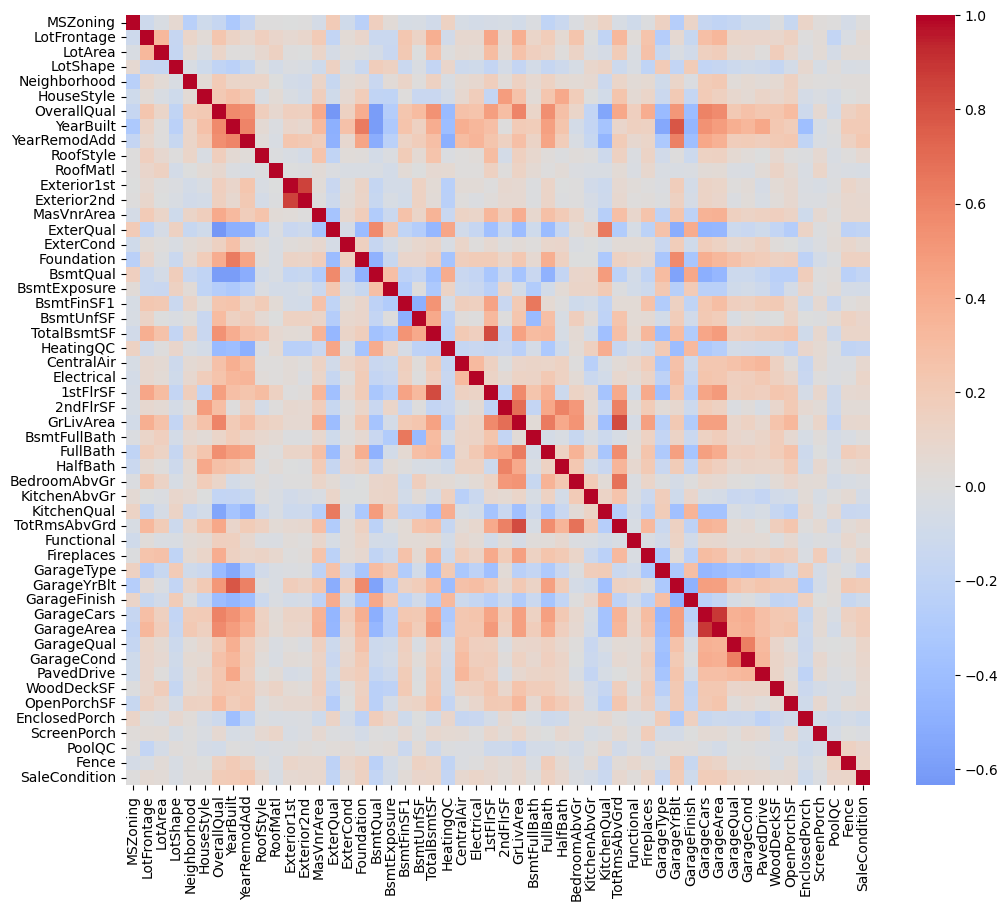

In [328]:
# Checking correlation between numerical features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)

In [329]:
category_means = {}
for col in categorical_features.columns:
    category_means[col] = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    print(category_means[col].head(10))

   - [Outlier Detection](#outlier-detection)

In [330]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR

    outliers = df[(df[col] < low_outliers) | (df[col] > upper_outliers)]

    print(f"Column: {col}, Outliers: {len(outliers)}")


Column: MSZoning, Outliers: 309
Column: LotFrontage, Outliers: 93
Column: LotArea, Outliers: 69
Column: LotShape, Outliers: 0
Column: Neighborhood, Outliers: 0
Column: HouseStyle, Outliers: 0
Column: OverallQual, Outliers: 2
Column: YearBuilt, Outliers: 7
Column: YearRemodAdd, Outliers: 0
Column: RoofStyle, Outliers: 319
Column: RoofMatl, Outliers: 26
Column: Exterior1st, Outliers: 21
Column: Exterior2nd, Outliers: 20
Column: MasVnrArea, Outliers: 98
Column: ExterQual, Outliers: 52
Column: ExterCond, Outliers: 178
Column: Foundation, Outliers: 9
Column: BsmtQual, Outliers: 0
Column: BsmtExposure, Outliers: 221
Column: BsmtFinSF1, Outliers: 7
Column: BsmtUnfSF, Outliers: 29
Column: TotalBsmtSF, Outliers: 61
Column: HeatingQC, Outliers: 0
Column: CentralAir, Outliers: 95
Column: Electrical, Outliers: 125
Column: 1stFlrSF, Outliers: 20
Column: 2ndFlrSF, Outliers: 2
Column: GrLivArea, Outliers: 31
Column: BsmtFullBath, Outliers: 1
Column: FullBath, Outliers: 0
Column: HalfBath, Outliers: 0

---

### 6. [Modeling / Statistical Analysis](#modeling--statistical-analysis)  

   - [Data train/test split](#Data-train-/-test-split)

In [331]:
random_state = 42
x = df
y = df_original['SalePrice']

In [332]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 52), (438, 52), (1022,), (438,))

   - [Model Selection & Training](#Model-Selection-&-Training)


 Feature Selection: Identifying and using only the most relevant features can reduce dimensionality, improve model interpretability, and potentially enhance performance and speed. Random Forest's built-in feature importance can be used for this.

In [333]:
ml_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
ml_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

max_depth: The maximum depth of each individual tree. Limiting depth can help prevent overfitting.




In [334]:
y_pred = ml_model.predict(X_test)

---

### 7. [Evaluation & Interpretation](#evaluation--interpretation)

In [335]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE:{rmse}, R2: {r2}")

MAE: 16865.117671232874, MSE: 696741539.2441288, RMSE:26395.86216140948, R2: 0.9001530270137353


In [336]:
cross_val_scores = cross_val_score(ml_model, x, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

Original: 154500.00, Predicted: 141761.25
Original: 325000.00, Predicted: 319173.51
Original: 115000.00, Predicted: 116088.00
Original: 159000.00, Predicted: 162924.00
Original: 315500.00, Predicted: 320730.10
Original: 75500.00, Predicted: 81394.50
Original: 311500.00, Predicted: 208142.67
Original: 146000.00, Predicted: 150818.90
Original: 84500.00, Predicted: 83057.50
Original: 135500.00, Predicted: 123576.21
Original: 145000.00, Predicted: 152118.52
Original: 130000.00, Predicted: 118161.00
Original: 81000.00, Predicted: 109953.50
Original: 214000.00, Predicted: 207333.51
Original: 181000.00, Predicted: 177772.85
Original: 134500.00, Predicted: 126673.25
Original: 183500.00, Predicted: 195736.05
Original: 135000.00, Predicted: 134433.50
Original: 118400.00, Predicted: 116674.50
Original: 226000.00, Predicted: 204764.71
Original: 155000.00, Predicted: 167047.03
Original: 210000.00, Predicted: 233120.87
Original: 173500.00, Predicted: 175451.39
Original: 129000.00, Predicted: 121966.

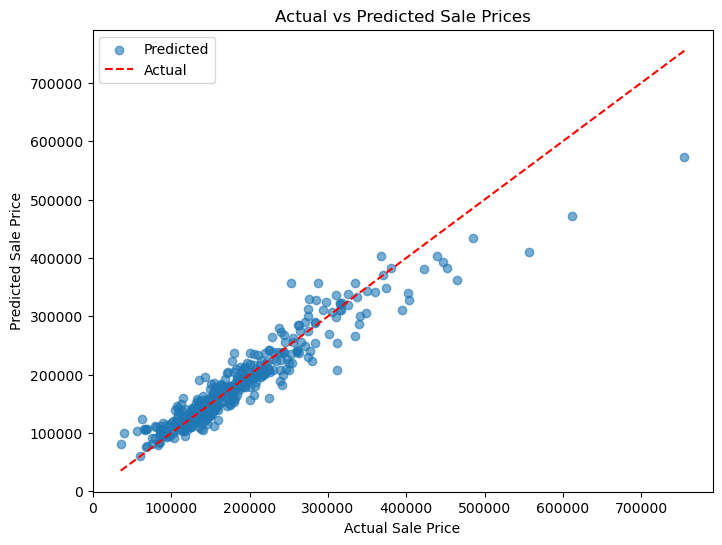

In [337]:
y_pred = ml_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.legend(['Predicted', 'Actual'])
plt.show()

### 8. [Optimization](#Optimization)

##### 8.1 [Hyperparameter tuning](#Hyperparameter_tuning)

In [338]:
# # Looping and finding the parameters for hyperparameter tuning - unhide, uncomment and run the code
# n_estimators = [i for i in range(150, 210, 1)]
# max_depth = [i for i in range(15, 21, 1)]
# max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 3, 5, 7, 10]
# cv = 5

# parameters = {
#     'n_estimators': n_estimators,
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'min_samples_split': min_samples_split
# }

# param_grid = RandomizedSearchCV(
#     estimator=ml_model,
#     param_distributions=parameters,
#     cv=cv,
#     random_state=random_state,
#     n_iter=30,
#     n_jobs=-1,
#     verbose=2,
#     scoring='neg_mean_squared_error'
# )

# param_grid.fit(X_train, y_train)

# y_pred_best = param_grid.predict(X_test)
# mae_best = mean_absolute_error(y_test, y_pred_best)
# mse_best = mean_squared_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print("Best Parameters:", param_grid.best_params_)
# print(f"Best MAE: {mae_best}, Best MSE: {mse_best}, Best R2: {r2_best}")


In [339]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=random_state)

ml_model_tuning = RandomForestRegressor(
    n_estimators=188,
    min_samples_split=3,
    max_features= 'auto',
    max_depth=19,
    random_state=random_state)


ml_model_tuning.fit(X_train, y_train)
y_pred_tuning = ml_model_tuning.predict(X_test)


mae_tuning = mean_absolute_error(y_test, y_pred_tuning)
mse_tuning = mean_squared_error(y_test, y_pred_tuning)
rmse_tuning = np.sqrt(mse_tuning)
r2_tunned = r2_score(y_test, y_pred_tuning)
print(f"MAE: {mae_tuning}, MSE: {mse_tuning}, RMSE:{rmse_tuning}, R2: {r2_tunned}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 16635.924899871352, MSE: 689153304.7600106, RMSE:26251.729557497933, R2: 0.9012404636037386


In [340]:
cross_val_scores = cross_val_score(ml_model_tuning, x, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

Original: 154500.00, Predicted: 141761.25
Original: 325000.00, Predicted: 319173.51
Original: 115000.00, Predicted: 116088.00
Original: 159000.00, Predicted: 162924.00
Original: 315500.00, Predicted: 320730.10
Original: 75500.00, Predicted: 81394.50
Original: 311500.00, Predicted: 208142.67
Original: 146000.00, Predicted: 150818.90
Original: 84500.00, Predicted: 83057.50
Original: 135500.00, Predicted: 123576.21
Original: 145000.00, Predicted: 152118.52
Original: 130000.00, Predicted: 118161.00
Original: 81000.00, Predicted: 109953.50
Original: 214000.00, Predicted: 207333.51
Original: 181000.00, Predicted: 177772.85
Original: 134500.00, Predicted: 126673.25
Original: 183500.00, Predicted: 195736.05
Original: 135000.00, Predicted: 134433.50
Original: 118400.00, Predicted: 116674.50
Original: 226000.00, Predicted: 204764.71
Original: 155000.00, Predicted: 167047.03
Original: 210000.00, Predicted: 233120.87
Original: 173500.00, Predicted: 175451.39
Original: 129000.00, Predicted: 121966.

##### 8.2 [PCA](#PCA)

In [341]:
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=random_state)

PCA = PCA(n_components=0.95, random_state=random_state)
X_train_pca = PCA.fit_transform(X_train)
X_test_pca = PCA.transform(X_test)

ml_model_pca = RandomForestRegressor(
    n_estimators=198,
    min_samples_split=12,
    max_features= 'auto',
    max_depth=17,
    random_state=random_state
    )

ml_model_pca.fit(X_train_pca, y_train)
y_pred_pca = ml_model_pca.predict(X_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"MAE: {mae_pca}, MSE: {mse_pca}, R2: {r2_pca}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 29409.26891673143, MSE: 2466910620.535862, R2: 0.678382567585671


##### 8.3 [Feature selection](#Feature_selection)

In [342]:
# top_corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[1:36]
# print("High Correlated Features:\n\n", top_corr)

In [343]:
# most_correlated_features = [top_corr.index[i] for i in range(1, 27)]
# most_correlated_features[:28]

In [344]:
# X_selected = df[most_correlated_features]
# X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=random_state)

In [345]:
# ml_model_feat_selec = RandomForestRegressor(
#     n_estimators=188,
#     min_samples_split=3,
#     max_features= 'auto',
#     max_depth=19,
#     random_state=random_state
#     )
# ml_model_feat_selec.fit(X_train_selected, y_train_selected)
# y_pred_feat_selec = ml_model_feat_selec.predict(X_test_selected)
# mae_feat_selec = mean_absolute_error(y_test_selected, y_pred_feat_selec)
# mse_feat_selec = mean_squared_error(y_test_selected, y_pred_feat_selec)
# r2_feat_selec = r2_score(y_test, y_pred_pca)

# print(f"MAE: {mae_feat_selec}, MSE: {mse_feat_selec}, R2: {r2_feat_selec}")

##### 8.3 [Up-sampling](#Up-sampling)

###### 8.3.1 [Dataset adjustment](#Dataset_adjustment)

In [346]:
# Adding the 'SalePrice' column back to the scaled DataFrame in order to upsampling
if 'SalePrice' in df.columns:
    X_scaled = df.drop('SalePrice', axis=1)
else:
    X_scaled = df.copy()
scaled_with_target = X_scaled.copy()
scaled_with_target['SalePrice'] = df_original['SalePrice']
scaled_with_target.head()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,SaleCondition,SalePrice
0,0.0,-0.25,-0.254076,0.0,-0.7,1.0,0.5,0.652174,0.243243,0.0,...,0.0,0.0,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,208500
1,0.0,0.50,0.030015,0.0,1.2,0.0,0.0,0.065217,-0.486486,0.0,...,0.0,0.0,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,181500
2,0.0,-0.10,0.437624,-1.0,-0.7,1.0,0.5,0.608696,0.216216,0.0,...,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,223500
3,0.0,-0.50,0.017663,-1.0,-0.6,1.0,0.5,-1.260870,-0.648649,0.0,...,0.0,0.0,0.000000,0.147059,272.0,0.0,0.0,0.0,-4.0,140000
4,0.0,0.70,1.181201,-1.0,0.3,1.0,1.0,0.586957,0.162162,0.0,...,0.0,0.0,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,250000


In [347]:
price_categories = pd.qcut(df_original['SalePrice'], q=3, labels=['Low', 'Medium', 'High'])

# scaled_without_target = df.drop(columns=['SalePrice'], inplace=False) -- This line is not needed as we already have X_scaled without 'SalePrice'

ros = RandomOverSampler(random_state=random_state, sampling_strategy='auto')

X_upsampled, price_cat_upsampled = ros.fit_resample(df, price_categories)

upsampled_indices = ros.sample_indices_
y_upsampled_continuous = df_original['SalePrice'].iloc[upsampled_indices].values

print("Upsampled price distribution:")
print(pd.Series(price_cat_upsampled).value_counts())


Upsampled price distribution:
SalePrice
Low       490
Medium    490
High      490
Name: count, dtype: int64


In [348]:
X_train, X_test, y_train, y_test = train_test_split(
    X_upsampled, y_upsampled_continuous, test_size=0.4, random_state=42)

rf_upsampled = RandomForestRegressor(
    n_estimators=178,
    min_samples_split=2,
    max_features= 'auto',
    max_depth=24,
    random_state=random_state
)

rf_upsampled.fit(X_train, y_train)
y_pred_upsampled = rf_upsampled.predict(X_test)

mae_upsampled = mean_absolute_error(y_test, y_pred_upsampled)
mse_upsampled = mean_squared_error(y_test, y_pred_upsampled)
rmse_upsampled = np.sqrt(mse_upsampled)
r2_upsampled = r2_score(y_test, y_pred_upsampled)

print(f"MAE: {mae_upsampled}, MSE: {mse_upsampled}, RMSE: {rmse_upsampled}, R2: {r2_upsampled}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 19691.593264225776, MSE: 1062045823.1122619, RMSE: 32589.044525917936, R2: 0.8460637296386229


In [349]:
cross_val_scores = cross_val_score(rf_upsampled, x, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred_upsampled):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

Original: 173000.00, Predicted: 173370.12
Original: 127000.00, Predicted: 123021.87
Original: 143000.00, Predicted: 146691.71
Original: 226000.00, Predicted: 204424.06
Original: 204900.00, Predicted: 218013.64
Original: 91300.00, Predicted: 103436.52
Original: 85400.00, Predicted: 94477.41
Original: 262500.00, Predicted: 283719.50
Original: 311500.00, Predicted: 209936.52
Original: 127000.00, Predicted: 127101.69
Original: 230500.00, Predicted: 243770.47
Original: 285000.00, Predicted: 297470.20
Original: 105500.00, Predicted: 118501.96
Original: 145000.00, Predicted: 150988.22
Original: 274970.00, Predicted: 163198.29
Original: 230000.00, Predicted: 199479.49
Original: 244000.00, Predicted: 273313.08
Original: 217000.00, Predicted: 201378.78
Original: 241500.00, Predicted: 170083.17
Original: 180000.00, Predicted: 171690.37
Original: 97000.00, Predicted: 109606.10
Original: 195400.00, Predicted: 200054.07
Original: 167500.00, Predicted: 151428.09
Original: 141000.00, Predicted: 108344

---

### 9. [Conclusions](#conclusions)

#### Results:
 - Random Forest Default:
    * MAE: 16865.117671232874 
    * MSE: 696741539.2441288
    * __R2: 0.9001530270137353__

 - Random Forest with hyperparameters:
    * MAE: 16635.924899871352
    * MSE: 689153304.7600106
    * RMSE:26251.729557497933
    * __R2: 0.9012404636037386__

 - Random Forest with PCA:
    * MAE: 29409.26891673143
    * MSE: 2466910620.535862
    * __R2: 0.678382567585671__

 - Random Forest with up-sampling dataset 
    * MAE: 19691.593264225776
    * MSE: 1062045823.11226198
    * RMSE: 32589.044525917936
    * __R2: 0.8460637296386229__


---